# Simple Linear Regression (Salary)

KETERANGAN KOLOM:
1. YearsExperience = Tahun Pengalaman
2. Salary = Gaji

## A. Data Preparation

### A.1 Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### A.2 Load Data

In [3]:
try:
    df = pd.read_csv('Salary.csv')
    print("Berhasil Membaca Data")
except Exception as e:
    print("Gagal Membaca Data")


Berhasil Membaca Data


In [4]:
df.head()

,YearsExperience,Salary
0,0.7,35010.0
1,1.2,37120.0
2,1.0,29033.0
3,1.5,40510.0
4,2.1,45200.0


### A.3 Cek Dimensi Data

In [5]:
df.shape

(90, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  89 non-null     float64
 1   Salary           89 non-null     float64
dtypes: float64(2)
memory usage: 1.5 KB


### A.4 Nilai Duplikasi

In [7]:
df.duplicated().sum()

np.int64(2)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(88, 2)

### A.5 Nilai Hilang

In [10]:
df.isna().sum()

YearsExperience    1
Salary             1
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(86, 2)

## B. Exploratory Data Analysis

### B.1 Cek Outliers

<Axes: >

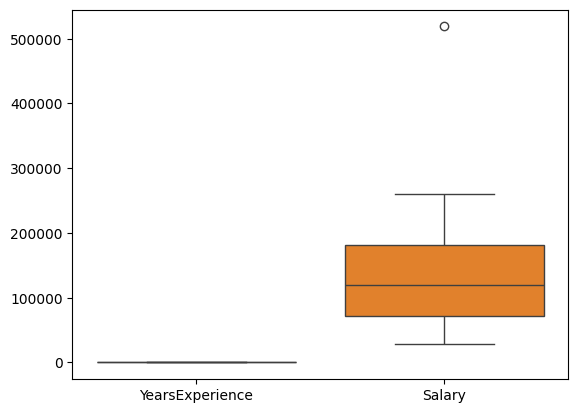

In [13]:
sns.boxplot(df)

In [14]:
df['Salary'] = df['Salary'].clip(0, 300000)

In [15]:
df.shape

(86, 2)

<Axes: >

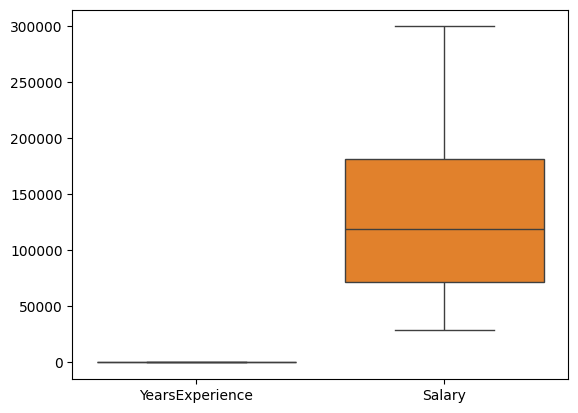

In [16]:
sns.boxplot(df)

### B.2 Visualisasi Scatter

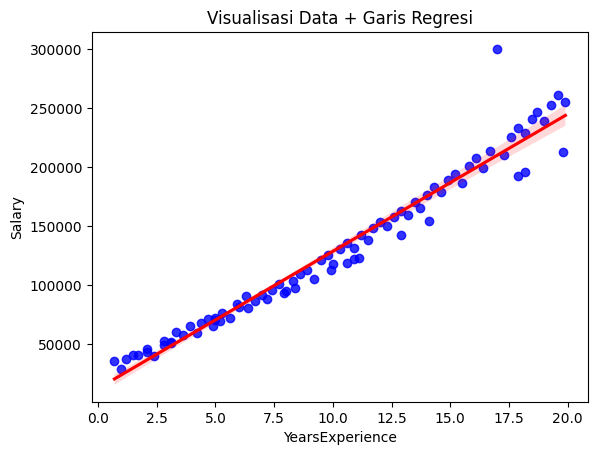

In [ ]:
sns.regplot(data=df, x='YearsExperience', y='Salary', color='blue', line_kws={'color': 'red'})
plt.title('Visualisasi Data + Garis Regresi')
plt.show()

### B.3 Visualisasi Korelasi

<Axes: >

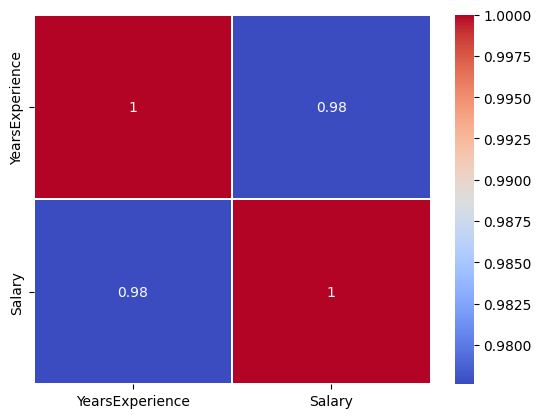

In [18]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=1.1)

## C. Pemodelan Data

### Rumus Inti (The Golden Formula)

Ini adalah metode **Normal Equation** untuk mencari garis regresi terbaik secara instan menggunakan Aljabar Linear (Matriks).

$$\theta = (X^T X)^{-1} X^T y$$

**Keterangan Simbol:**
* $\theta$ (**Theta**): Hasil akhir yang kita cari (Weights). Berisi koefisien (Slope/$m$) dan bias (Intercept/$c$).
* $X$ (**Features**): Data fitur/input. **Wajib** ditambah kolom angka `1` di depannya (sebagai bias).
* $y$ (**Target**): Data target (output/jawaban).
* $^T$ (**Transpose**): Operasi memutar matriks (baris menjadi kolom).
* $^{-1}$ (**Inverse**): Kebalikan matriks (analoginya seperti pembagian dalam angka biasa).

---
**Implementasi dalam Numpy:**
```python
# Asumsi X_matrix sudah memiliki kolom bias (angka 1)
theta = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ y_data

### C.1 Persiapan Data Untuk Matriks

In [19]:
X_data = df[['YearsExperience']].values
y_data = df[['Salary']].values

### C.2 Modifikasi Matriks (Tambah Bias)

In [20]:
# Kita perlu menambahkan angka '1' di depan setiap data X
# Agar rumus matriks bisa menghitung Intercept (Titik potong sumbu Y)
ones = np.ones((len(X_data), 1))
X_matrix = np.concatenate((ones, X_data), axis=1)

### C.3 Train Test Split (Membagi Data Latihan & Tes)

In [ ]:
# 1. Acak urutan data (Shuffling)
np.random.seed(42) # Biar hasilnya acak konsisten
indices = np.random.permutation(len(X_matrix))

# 2. Tentukan ukuran data test, disini kami ambil 20%
test_size = int(len(X_matrix) * 0.2)

# 3. Pisahkan Index
test_idx = indices[:test_size] #untuk tes 20%
train_idx = indices[test_size:] #untuk train sisanya yaitu 80%

# 4. Buat Variabel Train & Test
X_train, X_test = X_matrix[train_idx], X_matrix[test_idx]
y_train, y_test = y_data[train_idx], y_data[test_idx]

### C.4 Rumus Matriks Theta (The Normal Equation)

In [22]:
# 1. Hitung Theta dengan data train
# Kita cari rumus garis cuma pakai data latihan
theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

# 2. Hitung prediksi
# Kita tes modelnya suruh ngerjain soal
y_pred_test = X_test @ theta

In [23]:
np.save('model_gaji.npy', theta)
print("Model berhasil disimpan untuk GUI")

Model berhasil disimpan untuk GUI


### C.5 Ambil Hasil Modelling

In [24]:
intercept = theta[0][0] # Nilai C
slope = theta[1][0]     # Nilai M

print("--- HASIL MODELING ---")
print(f"Intercept (Gaji Awal): {intercept:.2f}")
print(f"Slope (Kenaikan per Tahun): {slope:.2f}")
print(f"Rumus Garis: y = {intercept:.2f} + {slope:.2f}x")
print("x = (Banyaknya Tahun)")

--- HASIL MODELING ---
Intercept (Gaji Awal): 12222.38
Slope (Kenaikan per Tahun): 11517.07
Rumus Garis: y = 12222.38 + 11517.07x
x = (Banyaknya Tahun)


### C.6 Visualisasi Hasil Regresi

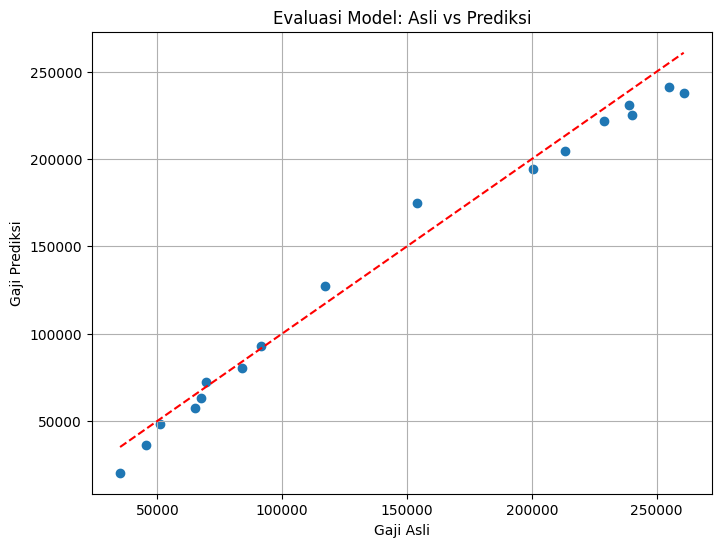

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.xlabel('Gaji Asli')
plt.ylabel('Gaji Prediksi')
plt.title('Evaluasi Model: Asli vs Prediksi')
plt.grid(True)
plt.show()

## D. Evaluasi Model

### D.1 Hitung MSE (Mean Squared Error)
Rata-rata kesalahan kuadrat (selisih riil dalam satuan kuadrat).
- Nilai Bagus: Semakin mendekati 0 semakin bagus.

In [26]:
error = y_test - y_pred_test
mse = np.mean(error ** 2)
mse

np.float64(123277801.44673122)

### D.2 Hitung MAE (Mean Absolute Error)
Rata-rata kesalahan mutlak (selisih riil dalam satuan asli).
- Nilai Bagus: Semakin mendekati 0 semakin bagus.

In [27]:
mae = np.mean(np.abs(error))
mae

np.float64(9355.713389436663)

### D.3 Hitung RMSE (Root Mean Squared Error)
Rata-rata kesalahan kuadrat diakar (selisih riil dalam satuan kuadrat).
- Nilai Bagus: Semakin mendekati 0 semakin bagus.

In [28]:
rmse = np.sqrt(mse)
rmse

np.float64(11103.053699173539)

### D.4 Hitung R-Squared (Akurasi)
Seberapa pintar model menjelaskan pola data (dalam persen).
- Nilai Bagus: Semakin mendekati 1 (100%) semakin bagus.

In [29]:
# Rumus: 1 - (Error Model Kita / Error Rata-rata Polos)
ss_residual = np.sum(error ** 2)
ss_total = np.sum((y_data - np.mean(y_data)) ** 2)
r2_score = 1 - (ss_residual / ss_total)
r2_score

np.float64(0.9944200571632325)

### D.5 Perbandingan Latihan dengan Ujian (Mencegah Overfitting)

In [30]:
#Hitung Akurasi Latihan (Train Set)
y_pred_train = X_train @ theta

error_train = y_train - y_pred_train
ss_res_train = np.sum(error_train ** 2)
ss_tot_train = np.sum((y_train - np.mean(y_train)) ** 2)
r2_train = 1 - (ss_res_train / ss_tot_train)

#Hitung Akurasi Ujian (Test Set)
error_test = y_test - y_pred_test
ss_res_test = np.sum(error_test ** 2)
ss_tot_test = np.sum((y_test - np.mean(y_test)) ** 2)
r2_test = 1 - (ss_res_test / ss_tot_test)

#Perbandingan
print(f"R2 Score Training : {r2_train:.5f}")
print(f"R2 Score Testing  : {r2_test:.5f}")
print(f"Selisih (Gap)     : {abs(r2_train - r2_test):.5f}")

#Analisa=
if abs(r2_train - r2_test) > 0.10: # Kalau bedanya lebih dari 10%
    print("\nOverfitting")
else:
    print("\nGood Fit")

R2 Score Training : 0.94307
R2 Score Testing  : 0.98169
Selisih (Gap)     : 0.03863

Good Fit
